## imports

In [36]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

In [4]:
#!kaggle competitions download -c digit-recognizer

100%|██████████████████████████████████████| 15.3M/15.3M [00:06<00:00, 2.60MB/s]
100%|██████████████████████████████████████| 15.3M/15.3M [00:06<00:00, 2.58MB/s]


In [5]:
import zipfile

with zipfile.ZipFile('digit-recognizer.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [8]:
!mkdir data
!mv *.csv data/

## Vizualization by plotting

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


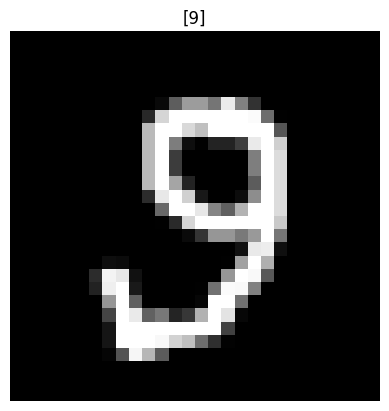

In [6]:
rand = np.random.randint(0, len(df), size=1)
img = df.iloc[rand, 1:].values.reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.title(df.iloc[rand, 0].values)
plt.axis('off')
plt.show()

- Plotting 10 images from each labels

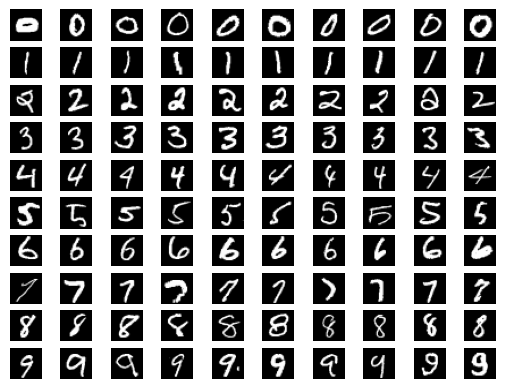

In [7]:
for i in range(10):
    for j in range(10):
        num_i = df[df['label']==i]
        num_i.head()
        rand = np.random.randint(0, len(num_i), size=1)
        img = num_i.iloc[rand, 1:].values.reshape(28, 28)
        plt.subplot(10, 10, i*10+j+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')


## One time call functions

In [8]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


def compare_historys(original_history, new_history, initial_epochs=5):
  """
  Compares two TensorFlow model History objects.
  
  Args:
    original_history: History object from original model (before new_history)
    new_history: History object from continued model training (after original_history)
    initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
  """
  
  # Get original history measurements
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  # Combine original history with new history
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plots
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label='Training Accuracy')
  plt.plot(total_val_acc, label='Validation Accuracy')
  plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label='Training Loss')
  plt.plot(total_val_loss, label='Validation Loss')
  plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

## Preprocessing 

In [9]:
train = pd.read_csv('data/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.iloc[0].max(), train.iloc[0].min()

(255, 0)

In [11]:
test = pd.read_csv('data/test.csv')

In [12]:
X_train_ = train.drop('label', axis=1)
y_train_ = train['label']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_, y_train_, test_size=0.1, random_state=42)

In [14]:
# Reshape data

X_train = X_train/255.
X_test = X_test/255.

test = test/255.

In [15]:
X_train.max()

pixel0      0.000000
pixel1      0.000000
pixel2      0.000000
pixel3      0.000000
pixel4      0.000000
              ...   
pixel779    0.243137
pixel780    0.000000
pixel781    0.000000
pixel782    0.000000
pixel783    0.000000
Length: 784, dtype: float64

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, test.shape

((37800, 784), (4200, 784), (37800,), (4200,), (28000, 784))

## Creating the Simple Sequential Model

In [17]:
# creat a sequential model

initial_epochs = 5

model_1 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(100,input_shape=X_train.iloc[0].shape),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

model_1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history_1 = model_1.fit(X_train,
            y_train, 
            epochs=initial_epochs,
            validation_data=(X_test, y_test))

Epoch 1/5


2023-02-19 19:06:35.386304: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 237081600 exceeds 10% of free system memory.


1163/1182 [============================>.] - ETA: 0s - loss: 0.3822 - accuracy: 0.8903

2023-02-19 19:06:38.518668: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 26342400 exceeds 10% of free system memory.


1182/1182 [==============================] - 3s 2ms/step - loss: 0.3810 - accuracy: 0.8906 - val_loss: 0.3107 - val_accuracy: 0.9110
Epoch 2/5
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2937 - accuracy: 0.9173 - val_loss: 0.3227 - val_accuracy: 0.9083
Epoch 3/5
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2787 - accuracy: 0.9213 - val_loss: 0.2943 - val_accuracy: 0.9145
Epoch 4/5
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2720 - accuracy: 0.9240 - val_loss: 0.3049 - val_accuracy: 0.9069
Epoch 5/5
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2636 - accuracy: 0.9250 - val_loss: 0.2981 - val_accuracy: 0.9155


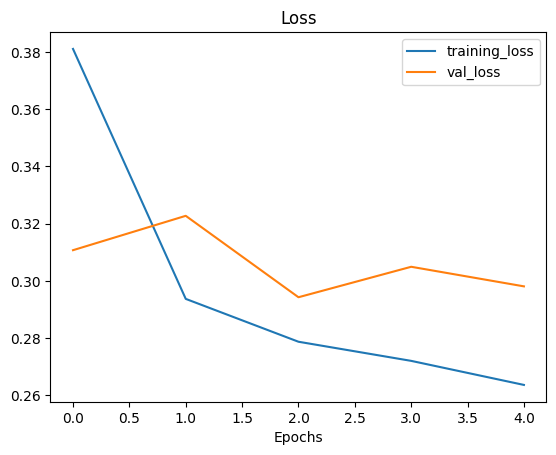

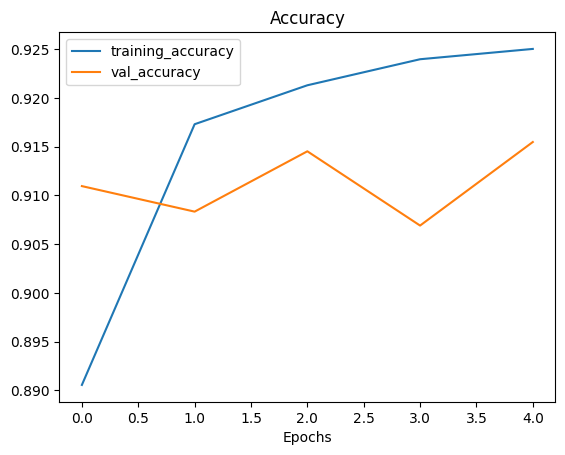

In [18]:
plot_loss_curves(history_1)

In [19]:
# let's train the same model for further 10 epochs

history_1b = model_1.fit(X_train,
            y_train,
            epochs=initial_epochs+10,
            validation_data=(X_test, y_test),
            initial_epoch=history_1.epoch[-1])


Epoch 5/15
  72/1182 [>.............................] - ETA: 2s - loss: 0.2440 - accuracy: 0.9288

2023-02-19 19:07:34.062894: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 237081600 exceeds 10% of free system memory.


1182/1182 [==============================] - 3s 2ms/step - loss: 0.2619 - accuracy: 0.9264 - val_loss: 0.3047 - val_accuracy: 0.9133
Epoch 6/15
   1/1182 [..............................] - ETA: 3s - loss: 0.1275 - accuracy: 0.9688

2023-02-19 19:07:36.646073: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 26342400 exceeds 10% of free system memory.


1182/1182 [==============================] - 2s 2ms/step - loss: 0.2562 - accuracy: 0.9274 - val_loss: 0.2967 - val_accuracy: 0.9183
Epoch 7/15
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2533 - accuracy: 0.9285 - val_loss: 0.3188 - val_accuracy: 0.9131
Epoch 8/15
1182/1182 [==============================] - 3s 2ms/step - loss: 0.2507 - accuracy: 0.9281 - val_loss: 0.3002 - val_accuracy: 0.9138
Epoch 9/15
1182/1182 [==============================] - 2s 2ms/step - loss: 0.2476 - accuracy: 0.9291 - val_loss: 0.3054 - val_accuracy: 0.9114
Epoch 10/15
1182/1182 [==============================] - 3s 2ms/step - loss: 0.2461 - accuracy: 0.9289 - val_loss: 0.3032 - val_accuracy: 0.9124
Epoch 11/15
1182/1182 [==============================] - 3s 2ms/step - loss: 0.2429 - accuracy: 0.9311 - val_loss: 0.3039 - val_accuracy: 0.9110
Epoch 12/15
1182/1182 [==============================] - 3s 2ms/step - loss: 0.2428 - accuracy: 0.9307 - val_loss: 0.3067 - val_accuracy: 0.9112


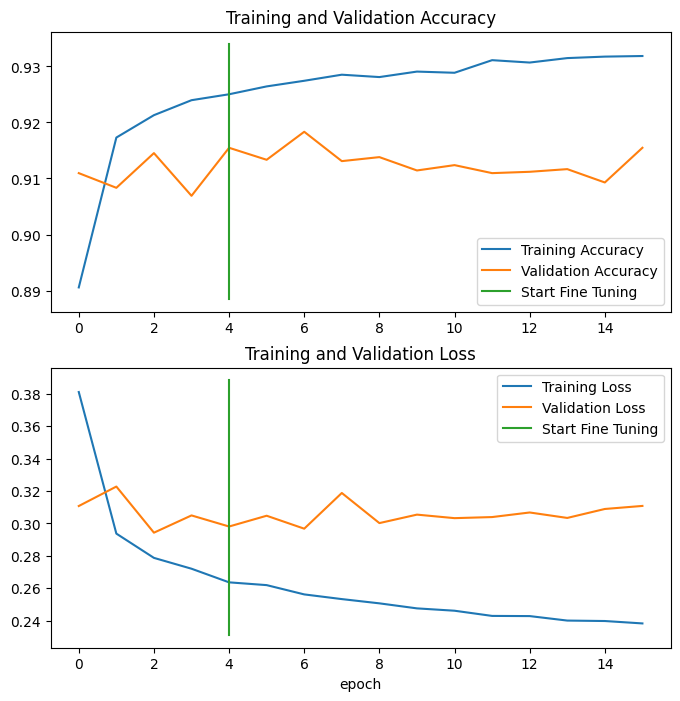

In [20]:
compare_historys(history_1, history_1b, initial_epochs)

- Above model is clearly overfitting.
- Let's try to add more layers to the model and see if it improves the accuracy.

In [21]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(100,input_shape=X_train.iloc[0].shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history_2 = model_2.fit(X_train,
            y_train,
            epochs=initial_epochs,
            validation_data=(X_test, y_test))
            

Epoch 1/5


2023-02-19 19:10:34.830194: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 237081600 exceeds 10% of free system memory.


1182/1182 [==============================] - 3s 2ms/step - loss: 0.3153 - accuracy: 0.9081 - val_loss: 0.1968 - val_accuracy: 0.9479
Epoch 2/5
1182/1182 [==============================] - 3s 2ms/step - loss: 0.1507 - accuracy: 0.9551 - val_loss: 0.1489 - val_accuracy: 0.9540
Epoch 3/5
1182/1182 [==============================] - 3s 2ms/step - loss: 0.1130 - accuracy: 0.9660 - val_loss: 0.1341 - val_accuracy: 0.9598
Epoch 4/5
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0919 - accuracy: 0.9714 - val_loss: 0.1208 - val_accuracy: 0.9640
Epoch 5/5
1182/1182 [==============================] - 3s 2ms/step - loss: 0.0789 - accuracy: 0.9751 - val_loss: 0.1242 - val_accuracy: 0.9626


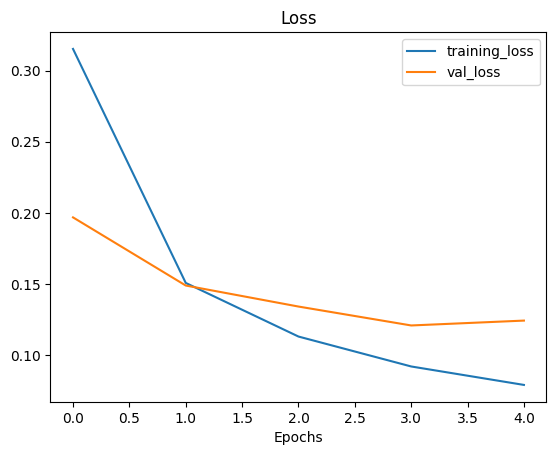

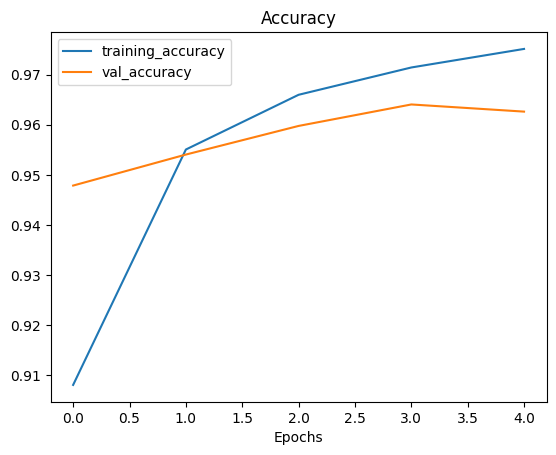

In [22]:
plot_loss_curves(history_2)

- let's make more complex model

In [23]:
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(625,input_shape=X_train.iloc[0].shape),
        tf.keras.layers.Dense(400, activation='tanh'),
        tf.keras.layers.Dense(324, activation='tanh'),
        tf.keras.layers.Dense(100, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

model_3.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history_3 = model_3.fit(X_train,
            y_train,
            epochs=initial_epochs,
            validation_data=(X_test, y_test))
            

Epoch 1/5
1182/1182 [==============================] - 12s 9ms/step - loss: 0.2920 - accuracy: 0.9112 - val_loss: 0.2172 - val_accuracy: 0.9355
Epoch 2/5
1182/1182 [==============================] - 11s 9ms/step - loss: 0.1651 - accuracy: 0.9494 - val_loss: 0.1880 - val_accuracy: 0.9390
Epoch 3/5
1182/1182 [==============================] - 11s 9ms/step - loss: 0.1340 - accuracy: 0.9582 - val_loss: 0.1646 - val_accuracy: 0.9505
Epoch 4/5
1182/1182 [==============================] - 11s 9ms/step - loss: 0.1199 - accuracy: 0.9626 - val_loss: 0.1675 - val_accuracy: 0.9464
Epoch 5/5
1182/1182 [==============================] - 11s 9ms/step - loss: 0.1087 - accuracy: 0.9667 - val_loss: 0.1671 - val_accuracy: 0.9517


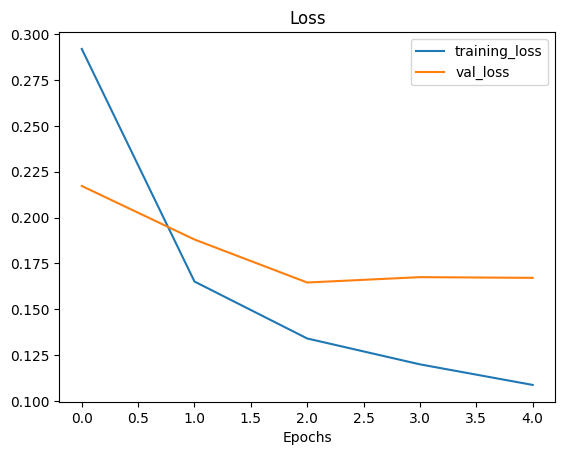

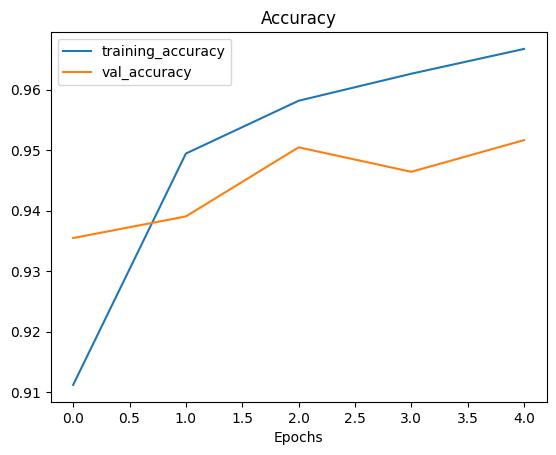

In [24]:
plot_loss_curves(history_3)

- Clearly overfitting

## CNN 1D model

In [25]:
# let's check what MaxPool1D does
var = tf.random.normal(shape=(1, 2, 3))
print(var)
tf.keras.layers.MaxPool1D()(var)

tf.Tensor(
[[[ 0.3274685 -0.8426258  0.3194337]
  [-1.4075519 -2.3880599 -1.0392479]]], shape=(1, 2, 3), dtype=float32)


<tf.Tensor: shape=(1, 1, 3), dtype=float32, numpy=array([[[ 0.3274685, -0.8426258,  0.3194337]]], dtype=float32)>

Hence we found that MaxPooling1D returns the maximum value of the input sequence. It is used to reduce the dimensionality of the input by reducing the number of parameters. It is used to reduce the dimensionality of the input by reducing the number of parameters.

In [27]:
tf.random.set_seed(42)
# CNN 1D model

model_4 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Reshape((784,1), input_shape=X_train.iloc[0].shape),
        tf.keras.layers.Conv1D(32, 3, activation='relu'),
        tf.keras.layers.MaxPool1D(2),
        tf.keras.layers.Conv1D(64, 3, activation='relu'),
        tf.keras.layers.MaxPool1D(2),
        # add batch normalization
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv1D(128, 3, activation='relu'),
        tf.keras.layers.MaxPool1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

model_4.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)   

history_4 = model_4.fit(X_train,
            y_train,
            epochs=initial_epochs,
            validation_data=(X_test , y_test))


Epoch 1/5
1182/1182 [==============================] - 50s 42ms/step - loss: 0.2264 - accuracy: 0.9330 - val_loss: 0.1621 - val_accuracy: 0.9481
Epoch 2/5
1182/1182 [==============================] - 49s 42ms/step - loss: 0.0991 - accuracy: 0.9693 - val_loss: 0.1172 - val_accuracy: 0.9655
Epoch 3/5
1182/1182 [==============================] - 50s 43ms/step - loss: 0.0686 - accuracy: 0.9784 - val_loss: 0.1206 - val_accuracy: 0.9638
Epoch 4/5
1182/1182 [==============================] - 49s 41ms/step - loss: 0.0516 - accuracy: 0.9836 - val_loss: 0.1122 - val_accuracy: 0.9671
Epoch 5/5
1182/1182 [==============================] - 49s 42ms/step - loss: 0.0338 - accuracy: 0.9890 - val_loss: 0.1307 - val_accuracy: 0.9667


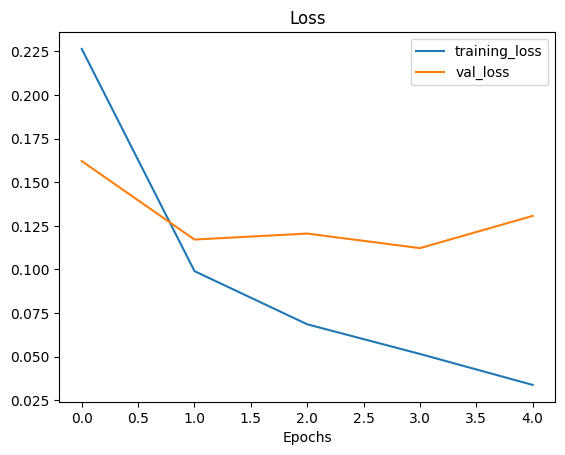

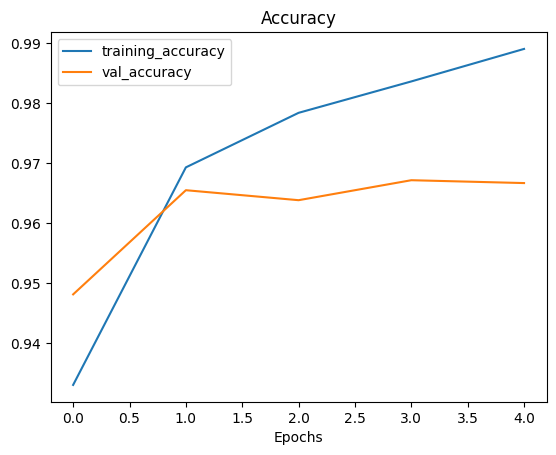

In [30]:
plot_loss_curves(history_4)

- Clearly, the model is overfitting. Let's try to add dropout layers to the model and see if it improves the accuracy.

In [32]:
tf.random.set_seed(42)

model_5 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Reshape((784,1), input_shape=X_train.iloc[0].shape),
        tf.keras.layers.Conv1D(32, 3, activation='tanh'),
        tf.keras.layers.MaxPool1D(2),
        tf.keras.layers.Conv1D(64, 3, activation='tanh'),
        tf.keras.layers.MaxPool1D(2),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Conv1D(128, 3, activation='tanh'),
        tf.keras.layers.MaxPool1D(2),
        # batch normalization
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

model_5.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

history_5 = model_5.fit(X_train,
            y_train,
            epochs=initial_epochs,
            validation_data=(X_test, y_test))


Epoch 1/5
1182/1182 [==============================] - 45s 37ms/step - loss: 0.3136 - accuracy: 0.9067 - val_loss: 0.2395 - val_accuracy: 0.9260
Epoch 2/5
1182/1182 [==============================] - 44s 37ms/step - loss: 0.2135 - accuracy: 0.9335 - val_loss: 0.1966 - val_accuracy: 0.9364
Epoch 3/5
1182/1182 [==============================] - 45s 38ms/step - loss: 0.1950 - accuracy: 0.9406 - val_loss: 0.2252 - val_accuracy: 0.9336
Epoch 4/5
1182/1182 [==============================] - 46s 39ms/step - loss: 0.1869 - accuracy: 0.9424 - val_loss: 0.1765 - val_accuracy: 0.9433
Epoch 5/5
1182/1182 [==============================] - 44s 38ms/step - loss: 0.1825 - accuracy: 0.9434 - val_loss: 0.1761 - val_accuracy: 0.9421


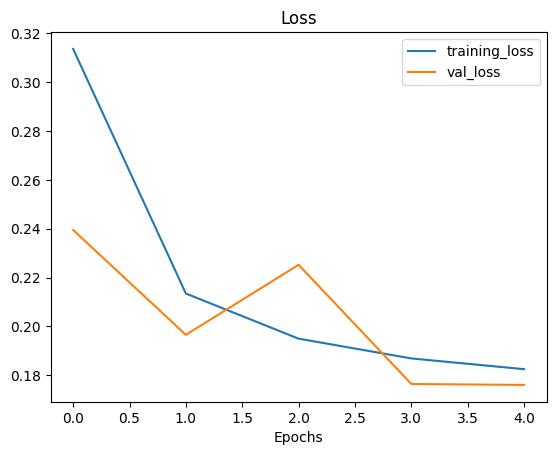

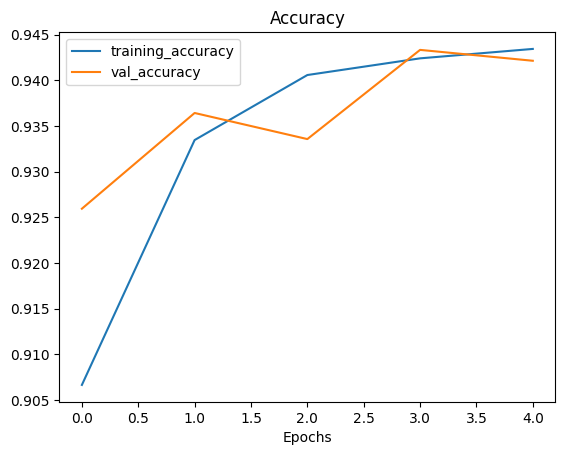

In [33]:
plot_loss_curves(history_5)

## CNN 2D model

In [34]:
# let's create callbacks

from tensorflow.keras.callbacks import ModelCheckpoint
def model_checkpoint(name, directory="MNIST"):
    dir = os.path.join(directory, name)
    mch = ModelCheckpoint(
        dir, monitor='val_accuracy', verbose=1, save_best_only=True,
        save_weights_only=False, mode='auto', save_freq='epoch',
    )
    return mch



In [37]:
tf.random.set_seed(42)
initial_epochs =5
model_6 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Reshape((28,28,1), input_shape=X_train.iloc[0].shape),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Dropout(0.4),
        # batch normalization
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(128, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]

)

model_6.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']

)

history_6 = model_6.fit(X_train,
            y_train,
            epochs=initial_epochs,
            validation_data=(X_test, y_test),
            callbacks=[model_checkpoint("model_6")]
)
            

Epoch 1/5
1178/1182 [============================>.] - ETA: 0s - loss: 0.3346 - accuracy: 0.8938
Epoch 1: val_accuracy improved from -inf to 0.97548, saving model to MNIST/model_6


INFO:tensorflow:Assets written to: MNIST/model_6/assets


INFO:tensorflow:Assets written to: MNIST/model_6/assets


1182/1182 [==============================] - 16s 13ms/step - loss: 0.3343 - accuracy: 0.8939 - val_loss: 0.0778 - val_accuracy: 0.9755
Epoch 2/5
1181/1182 [============================>.] - ETA: 0s - loss: 0.1428 - accuracy: 0.9556
Epoch 2: val_accuracy did not improve from 0.97548
1182/1182 [==============================] - 14s 12ms/step - loss: 0.1428 - accuracy: 0.9556 - val_loss: 0.0939 - val_accuracy: 0.9702
Epoch 3/5
1179/1182 [============================>.] - ETA: 0s - loss: 0.1131 - accuracy: 0.9642
Epoch 3: val_accuracy improved from 0.97548 to 0.98286, saving model to MNIST/model_6


INFO:tensorflow:Assets written to: MNIST/model_6/assets


INFO:tensorflow:Assets written to: MNIST/model_6/assets


1182/1182 [==============================] - 16s 13ms/step - loss: 0.1129 - accuracy: 0.9642 - val_loss: 0.0585 - val_accuracy: 0.9829
Epoch 4/5
1178/1182 [============================>.] - ETA: 0s - loss: 0.1027 - accuracy: 0.9675
Epoch 4: val_accuracy did not improve from 0.98286
1182/1182 [==============================] - 14s 12ms/step - loss: 0.1026 - accuracy: 0.9676 - val_loss: 0.0557 - val_accuracy: 0.9812
Epoch 5/5
1178/1182 [============================>.] - ETA: 0s - loss: 0.0929 - accuracy: 0.9714
Epoch 5: val_accuracy improved from 0.98286 to 0.98333, saving model to MNIST/model_6


INFO:tensorflow:Assets written to: MNIST/model_6/assets


INFO:tensorflow:Assets written to: MNIST/model_6/assets


1182/1182 [==============================] - 15s 13ms/step - loss: 0.0929 - accuracy: 0.9714 - val_loss: 0.0561 - val_accuracy: 0.9833


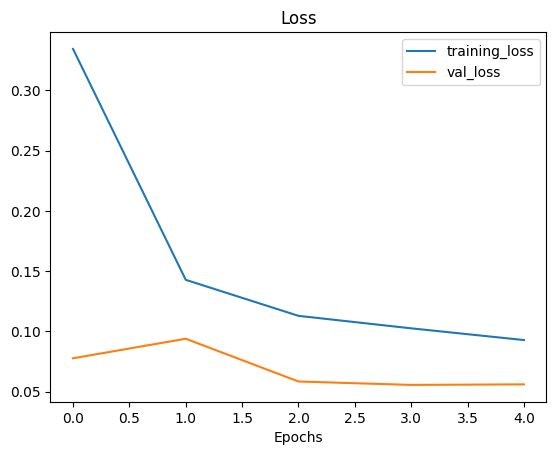

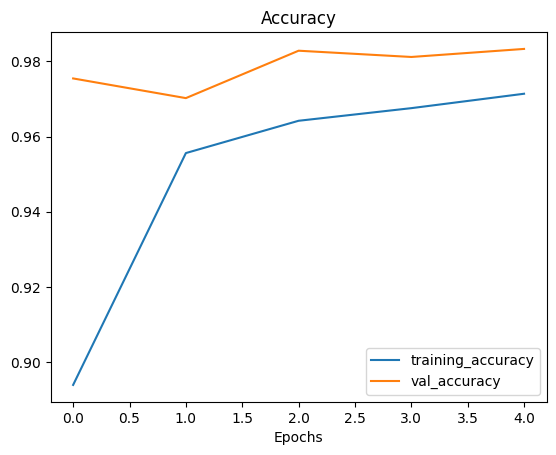

In [38]:
plot_loss_curves(history_6)

- As our model is going good let's train for more epochs.

In [39]:
# start tuning the CNN model

fine_tune_epochs = initial_epochs + 5

history_6b = model_6.fit(X_train,
            y_train,
            epochs=fine_tune_epochs,
            initial_epoch=history_6.epoch[-1],
            validation_data=(X_test, y_test),
            callbacks=[model_checkpoint("model_6b")]
)
            

Epoch 5/10
1181/1182 [============================>.] - ETA: 0s - loss: 0.0823 - accuracy: 0.9738
Epoch 5: val_accuracy improved from -inf to 0.98690, saving model to MNIST/model_6b


INFO:tensorflow:Assets written to: MNIST/model_6b/assets


INFO:tensorflow:Assets written to: MNIST/model_6b/assets


1182/1182 [==============================] - 15s 13ms/step - loss: 0.0822 - accuracy: 0.9738 - val_loss: 0.0444 - val_accuracy: 0.9869
Epoch 6/10
1179/1182 [============================>.] - ETA: 0s - loss: 0.0753 - accuracy: 0.9756
Epoch 6: val_accuracy did not improve from 0.98690
1182/1182 [==============================] - 14s 12ms/step - loss: 0.0753 - accuracy: 0.9756 - val_loss: 0.0495 - val_accuracy: 0.9848
Epoch 7/10
1179/1182 [============================>.] - ETA: 0s - loss: 0.0707 - accuracy: 0.9777
Epoch 7: val_accuracy did not improve from 0.98690
1182/1182 [==============================] - 14s 12ms/step - loss: 0.0708 - accuracy: 0.9777 - val_loss: 0.0435 - val_accuracy: 0.9867
Epoch 8/10
1180/1182 [============================>.] - ETA: 0s - loss: 0.0682 - accuracy: 0.9775
Epoch 8: val_accuracy improved from 0.98690 to 0.98714, saving model to MNIST/model_6b


INFO:tensorflow:Assets written to: MNIST/model_6b/assets


INFO:tensorflow:Assets written to: MNIST/model_6b/assets


1182/1182 [==============================] - 15s 13ms/step - loss: 0.0683 - accuracy: 0.9775 - val_loss: 0.0434 - val_accuracy: 0.9871
Epoch 9/10
1180/1182 [============================>.] - ETA: 0s - loss: 0.0694 - accuracy: 0.9780
Epoch 9: val_accuracy did not improve from 0.98714
1182/1182 [==============================] - 15s 12ms/step - loss: 0.0694 - accuracy: 0.9780 - val_loss: 0.0411 - val_accuracy: 0.9867
Epoch 10/10
1179/1182 [============================>.] - ETA: 0s - loss: 0.0641 - accuracy: 0.9796
Epoch 10: val_accuracy improved from 0.98714 to 0.98905, saving model to MNIST/model_6b


INFO:tensorflow:Assets written to: MNIST/model_6b/assets


INFO:tensorflow:Assets written to: MNIST/model_6b/assets


1182/1182 [==============================] - 16s 14ms/step - loss: 0.0640 - accuracy: 0.9796 - val_loss: 0.0414 - val_accuracy: 0.9890


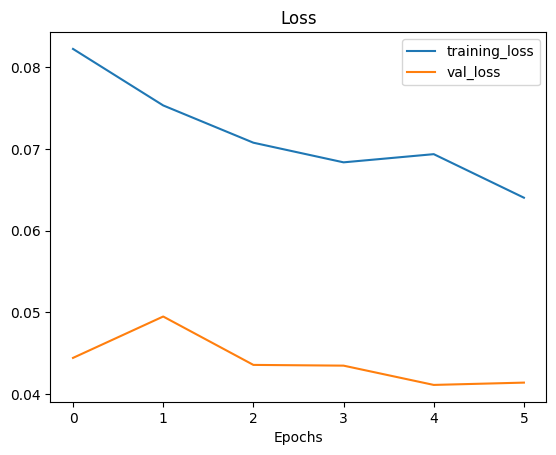

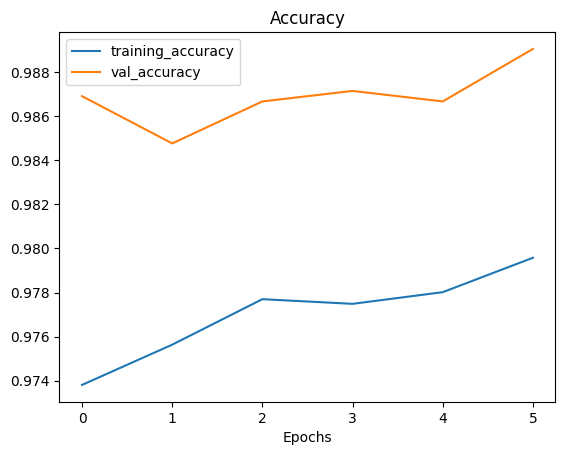

In [40]:
plot_loss_curves(history_6b)

# let's try to add more layers to the model and see if it improves the accuracy.

In [41]:
tf.random.set_seed(42)

model_7 = tf.keras.models.Sequential(
    [
        tf.keras.layers.Reshape((28,28,1), input_shape=X_train.iloc[0].shape, name='input_layer'),
        tf.keras.layers.Conv2D(32, 3, activation='relu', name='conv_1'),
        tf.keras.layers.Conv2D(64, 3, activation='relu', name='conv_2'),
        tf.keras.layers.MaxPool2D(2, name='max_pool_1'),
        tf.keras.layers.BatchNormalization( name='batch_norm_1'),
        tf.keras.layers.Dropout(0.4,    name='dropout_1'),

        tf.keras.layers.Conv2D(64, 3, activation='relu', name='conv_3'),
        tf.keras.layers.Conv2D(128, 3, activation='relu', name='conv_4'),
        tf.keras.layers.MaxPool2D(2, name='max_pool_2'),
        tf.keras.layers.BatchNormalization( name='batch_norm_2'),
        tf.keras.layers.Dropout(0.4,    name='dropout_2'),


        tf.keras.layers.Conv2D(128, 3, activation='relu',   name='conv_5'),
        # tf.keras.layers.Conv2D(256, 3, activation='relu',  name='conv_6'),
        tf.keras.layers.MaxPool2D(2, name='max_pool_3'),
        tf.keras.layers.BatchNormalization( name='batch_norm_3'),
        tf.keras.layers.Dropout(0.4,    name='dropout_3'),
        # global average pooling
        tf.keras.layers.GlobalAveragePooling2D( name='global_average_pooling'),
        tf.keras.layers.Dense(128, activation='relu', name='dense_1'),
        tf.keras.layers.Dense(10, activation='softmax', name='dense_2')
    ]

)

model_7.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
    
)

history_7 = model_7.fit(X_train,
            y_train,
            epochs=100,
            validation_data=(X_test, y_test),
            callbacks=[model_checkpoint("model_7")]
)


Epoch 1/100
1182/1182 [==============================] - ETA: 0s - loss: 0.2167 - accuracy: 0.9323
Epoch 1: val_accuracy improved from -inf to 0.98381, saving model to MNIST/model_7


INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 53s 44ms/step - loss: 0.2167 - accuracy: 0.9323 - val_loss: 0.0513 - val_accuracy: 0.9838
Epoch 2/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0835 - accuracy: 0.9745
Epoch 2: val_accuracy improved from 0.98381 to 0.98667, saving model to MNIST/model_7


INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 50s 42ms/step - loss: 0.0835 - accuracy: 0.9744 - val_loss: 0.0443 - val_accuracy: 0.9867
Epoch 3/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0647 - accuracy: 0.9808
Epoch 3: val_accuracy did not improve from 0.98667
1182/1182 [==============================] - 50s 43ms/step - loss: 0.0646 - accuracy: 0.9808 - val_loss: 0.0470 - val_accuracy: 0.9864
Epoch 4/100
1182/1182 [==============================] - ETA: 0s - loss: 0.0577 - accuracy: 0.9820
Epoch 4: val_accuracy improved from 0.98667 to 0.99000, saving model to MNIST/model_7


INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 52s 44ms/step - loss: 0.0577 - accuracy: 0.9820 - val_loss: 0.0333 - val_accuracy: 0.9900
Epoch 5/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0529 - accuracy: 0.9837
Epoch 5: val_accuracy did not improve from 0.99000
1182/1182 [==============================] - 50s 42ms/step - loss: 0.0529 - accuracy: 0.9837 - val_loss: 0.0329 - val_accuracy: 0.9893
Epoch 6/100
1182/1182 [==============================] - ETA: 0s - loss: 0.0475 - accuracy: 0.9857
Epoch 6: val_accuracy improved from 0.99000 to 0.99143, saving model to MNIST/model_7


INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 48s 41ms/step - loss: 0.0475 - accuracy: 0.9857 - val_loss: 0.0329 - val_accuracy: 0.9914
Epoch 7/100
1182/1182 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9870
Epoch 7: val_accuracy improved from 0.99143 to 0.99190, saving model to MNIST/model_7


INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 48s 40ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0281 - val_accuracy: 0.9919
Epoch 8/100
1180/1182 [============================>.] - ETA: 0s - loss: 0.0422 - accuracy: 0.9867
Epoch 8: val_accuracy did not improve from 0.99190
1182/1182 [==============================] - 44s 37ms/step - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.0245 - val_accuracy: 0.9919
Epoch 9/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0378 - accuracy: 0.9884
Epoch 9: val_accuracy did not improve from 0.99190
1182/1182 [==============================] - 50s 42ms/step - loss: 0.0379 - accuracy: 0.9883 - val_loss: 0.0242 - val_accuracy: 0.9914
Epoch 10/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0361 - accuracy: 0.9889
Epoch 10: val_accuracy did not improve from 0.99190
1182/1182 [==============================] - 49s 42ms/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.0306 - val_accuracy: 0.9900
Epoch 11

INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 59s 50ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0259 - val_accuracy: 0.9921
Epoch 14/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0289 - accuracy: 0.9909
Epoch 14: val_accuracy improved from 0.99214 to 0.99357, saving model to MNIST/model_7


INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 58s 49ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 0.0250 - val_accuracy: 0.9936
Epoch 15/100
1182/1182 [==============================] - ETA: 0s - loss: 0.0293 - accuracy: 0.9913
Epoch 15: val_accuracy did not improve from 0.99357
1182/1182 [==============================] - 56s 48ms/step - loss: 0.0293 - accuracy: 0.9913 - val_loss: 0.0268 - val_accuracy: 0.9919
Epoch 16/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9919
Epoch 16: val_accuracy did not improve from 0.99357
1182/1182 [==============================] - 56s 47ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0270 - val_accuracy: 0.9919
Epoch 17/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0227 - accuracy: 0.9929
Epoch 17: val_accuracy did not improve from 0.99357
1182/1182 [==============================] - 57s 48ms/step - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0209 - val_accuracy: 0.9936
Epoc

INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 52s 44ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0201 - val_accuracy: 0.9938
Epoch 22/100
1182/1182 [==============================] - ETA: 0s - loss: 0.0212 - accuracy: 0.9933
Epoch 22: val_accuracy did not improve from 0.99381
1182/1182 [==============================] - 49s 42ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.0231 - val_accuracy: 0.9938
Epoch 23/100
1182/1182 [==============================] - ETA: 0s - loss: 0.0189 - accuracy: 0.9944
Epoch 23: val_accuracy did not improve from 0.99381
1182/1182 [==============================] - 51s 43ms/step - loss: 0.0189 - accuracy: 0.9944 - val_loss: 0.0257 - val_accuracy: 0.9931
Epoch 24/100
1182/1182 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9933
Epoch 24: val_accuracy did not improve from 0.99381
1182/1182 [==============================] - 51s 43ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0240 - val_accuracy: 0.9924
Epoc

INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 44s 37ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0250 - val_accuracy: 0.9945
Epoch 28/100
1180/1182 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9953
Epoch 28: val_accuracy did not improve from 0.99452
1182/1182 [==============================] - 43s 36ms/step - loss: 0.0158 - accuracy: 0.9953 - val_loss: 0.0216 - val_accuracy: 0.9940
Epoch 29/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9939
Epoch 29: val_accuracy did not improve from 0.99452
1182/1182 [==============================] - 43s 36ms/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.0300 - val_accuracy: 0.9931
Epoch 30/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0169 - accuracy: 0.9945
Epoch 30: val_accuracy improved from 0.99452 to 0.99476, saving model to MNIST/model_7


INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 44s 37ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0233 - val_accuracy: 0.9948
Epoch 31/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9953
Epoch 31: val_accuracy did not improve from 0.99476
1182/1182 [==============================] - 48s 41ms/step - loss: 0.0158 - accuracy: 0.9953 - val_loss: 0.0231 - val_accuracy: 0.9948
Epoch 32/100
1182/1182 [==============================] - ETA: 0s - loss: 0.0145 - accuracy: 0.9956
Epoch 32: val_accuracy did not improve from 0.99476
1182/1182 [==============================] - 51s 43ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0277 - val_accuracy: 0.9929
Epoch 33/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0145 - accuracy: 0.9956
Epoch 33: val_accuracy did not improve from 0.99476
1182/1182 [==============================] - 50s 43ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0246 - val_accuracy: 0.9926
Epoc

INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 52s 44ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0211 - val_accuracy: 0.9950
Epoch 52/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0109 - accuracy: 0.9963
Epoch 52: val_accuracy did not improve from 0.99500
1182/1182 [==============================] - 49s 42ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0239 - val_accuracy: 0.9938
Epoch 53/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0100 - accuracy: 0.9967
Epoch 53: val_accuracy did not improve from 0.99500
1182/1182 [==============================] - 49s 42ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0274 - val_accuracy: 0.9940
Epoch 54/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0108 - accuracy: 0.9967
Epoch 54: val_accuracy did not improve from 0.99500
1182/1182 [==============================] - 49s 42ms/step - loss: 0.0108 - accuracy: 0.9967 - val_loss: 0.0237 - val_accuracy: 0.9936
Epoc

INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 51s 43ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0.0259 - val_accuracy: 0.9952
Epoch 69/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0100 - accuracy: 0.9971
Epoch 69: val_accuracy did not improve from 0.99524
1182/1182 [==============================] - 49s 42ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0239 - val_accuracy: 0.9948
Epoch 70/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9971
Epoch 70: val_accuracy did not improve from 0.99524
1182/1182 [==============================] - 49s 42ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0237 - val_accuracy: 0.9940
Epoch 71/100
1182/1182 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 0.9963
Epoch 71: val_accuracy did not improve from 0.99524
1182/1182 [==============================] - 50s 42ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0286 - val_accuracy: 0.9929
Epoc

INFO:tensorflow:Assets written to: MNIST/model_7/assets


INFO:tensorflow:Assets written to: MNIST/model_7/assets


1182/1182 [==============================] - 51s 43ms/step - loss: 0.0082 - accuracy: 0.9976 - val_loss: 0.0209 - val_accuracy: 0.9955
Epoch 79/100
1182/1182 [==============================] - ETA: 0s - loss: 0.0068 - accuracy: 0.9980
Epoch 79: val_accuracy did not improve from 0.99548
1182/1182 [==============================] - 51s 43ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0256 - val_accuracy: 0.9943
Epoch 80/100
1181/1182 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9970
Epoch 80: val_accuracy did not improve from 0.99548
1182/1182 [==============================] - 50s 42ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0251 - val_accuracy: 0.9948
Epoch 81/100
1182/1182 [==============================] - ETA: 0s - loss: 0.0072 - accuracy: 0.9977
Epoch 81: val_accuracy did not improve from 0.99548
1182/1182 [==============================] - 50s 42ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0248 - val_accuracy: 0.9945
Epoc

***

In [42]:
model_6.evaluate(X_test, y_test)

132/132 [==============================] - 1s 4ms/step - loss: 0.0414 - accuracy: 0.9890


[0.04137023538351059, 0.989047646522522]

In [48]:
model_6.evaluate(X_train_/255., y_train_)

1313/1313 [==============================] - 5s 4ms/step - loss: 0.0201 - accuracy: 0.9945


[0.02013089880347252, 0.9944761991500854]

- Let's check the accuracy for model 7

In [49]:
model_7.evaluate(X_train_/255., y_train_)

1313/1313 [==============================] - 12s 9ms/step - loss: 0.0020 - accuracy: 0.9995


[0.001994974911212921, 0.9994999766349792]

In [50]:
model_7.evaluate(X_test, y_test)

132/132 [==============================] - 1s 9ms/step - loss: 0.0191 - accuracy: 0.9952


[0.019139304757118225, 0.9952380657196045]

- As model_7 performed well so making the final prediction on test data

In [51]:
test = pd.read_csv('data/test.csv')
test = test/255.

In [52]:
test_pred = model_7.predict(test)

875/875 [==============================] - 8s 9ms/step


In [53]:
test_pred[0]

array([3.4974776e-20, 5.0634451e-23, 9.9999994e-01, 5.4681668e-16,
       1.2840149e-16, 9.9972653e-21, 1.3195352e-21, 2.1904503e-15,
       4.9166686e-17, 6.9469275e-18], dtype=float32)

In [54]:
tf.argmax(test_pred[0])

<tf.Tensor: shape=(), dtype=int64, numpy=2>

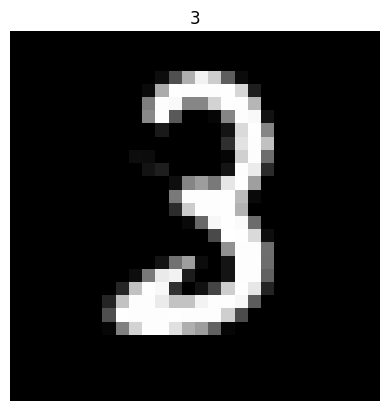

In [55]:
index_val = 4

img = test.iloc[index_val, :].values.reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.title(np.argmax(test_pred, axis=1)[index_val])
plt.axis('off')
plt.show()

In [56]:
# get the labels
labels = np.argmax(test_pred, axis=1)
labels

array([2, 0, 9, ..., 3, 9, 2])

In [57]:
ids = np.arange(1, len(labels)+1)

submission = pd.DataFrame({'ImageId': ids, 'Label': labels})
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [58]:
submission.to_csv('submission.csv', index=False)

In [59]:
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "CNN model with 99.5% accuracy"

100%|████████████████████████████████████████| 208k/208k [00:04<00:00, 42.9kB/s]
Successfully submitted to Digit Recognizer